In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader

from config import Config
from img_comment_dataset import ImgCommentDataset
from img_embedding import ImageEmbedding
from img_util import show_img_tensor_CHW

from pathlib import Path

from common_util import get_logger
logger = get_logger(__name__)

/opt/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0022820183..1.0000001].


Enriched img id: /tmp/enriched_results.csv
tokens: 128000
tokenizer.is_fast: True
batch_img_tensor: torch.Size([2, 3, 224, 224])
batch_img_id_tensor: torch.Size([2])
batch_comment_encoding: torch.Size([2, 50])
batch_comment_mask: torch.Size([2, 50])


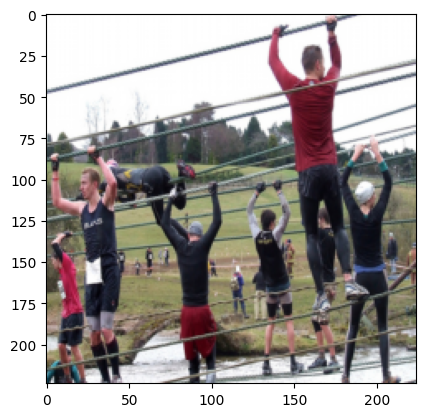

In [2]:
config = Config()

train_dataset = ImgCommentDataset(config, split="train")

BATCH_SIZE = 2
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

batch_img_tensor, batch_img_id_tensor, batch_comment_encoding, batch_comment_mask = (
    next(iter(train_dataloader))
)
logger.info(f"batch_img_tensor: {batch_img_tensor.size()}")
logger.info(f"batch_img_id_tensor: {batch_img_id_tensor.size()}")
logger.info(f"batch_comment_encoding: {batch_comment_encoding.size()}")
logger.info(f"batch_comment_mask: {batch_comment_mask.size()}")
show_img_tensor_CHW(img_tensor=batch_img_tensor[0])

In [3]:
img_embedding = ImageEmbedding(config=config)
img_embedding = img_embedding(batch_img_tensor)
logger.info(f"img_encoding: {img_embedding.size()}")

img_encoding: torch.Size([2, 196, 728])


In [4]:
# -log(prob)= 0.3 -> prob = e**(-0.3)
2.718 ** (-0.357), 2.718 ** (-0.24), -torch.tensor(0.9).log()

(0.6997984004922808, 0.7866474359348317, tensor(0.1054))

In [5]:
batch_img_tensor[0].size()

torch.Size([3, 224, 224])

In [6]:
test_i = torch.rand(1, 5, 5)
test_i.size(), test_i.expand(3, -1, -1).size(), torch.allclose(
    test_i, test_i.expand(3, -1, -1)
)
test_i

tensor([[[0.6891, 0.5487, 0.7752, 0.7293, 0.4430],
         [0.3758, 0.7384, 0.2601, 0.5374, 0.6826],
         [0.9411, 0.0126, 0.6364, 0.1832, 0.8518],
         [0.8590, 0.2065, 0.5696, 0.7543, 0.8498],
         [0.8887, 0.8675, 0.1853, 0.7752, 0.0124]]])

In [7]:
test_i.expand(3, -1, -1)

tensor([[[0.6891, 0.5487, 0.7752, 0.7293, 0.4430],
         [0.3758, 0.7384, 0.2601, 0.5374, 0.6826],
         [0.9411, 0.0126, 0.6364, 0.1832, 0.8518],
         [0.8590, 0.2065, 0.5696, 0.7543, 0.8498],
         [0.8887, 0.8675, 0.1853, 0.7752, 0.0124]],

        [[0.6891, 0.5487, 0.7752, 0.7293, 0.4430],
         [0.3758, 0.7384, 0.2601, 0.5374, 0.6826],
         [0.9411, 0.0126, 0.6364, 0.1832, 0.8518],
         [0.8590, 0.2065, 0.5696, 0.7543, 0.8498],
         [0.8887, 0.8675, 0.1853, 0.7752, 0.0124]],

        [[0.6891, 0.5487, 0.7752, 0.7293, 0.4430],
         [0.3758, 0.7384, 0.2601, 0.5374, 0.6826],
         [0.9411, 0.0126, 0.6364, 0.1832, 0.8518],
         [0.8590, 0.2065, 0.5696, 0.7543, 0.8498],
         [0.8887, 0.8675, 0.1853, 0.7752, 0.0124]]])